# Libraries

Data manipulation

In [ ]:
import numpy as np
import pandas as pd
import itertools
import random as rn

Data visualization libraries

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

Data preparation and models

In [ ]:
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, LSTM, LeakyReLU, Dropout

np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

2021-09-26 08:24:24.312656: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-09-26 08:24:24.312712: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Data Manipulation

### Data exploration

Data source &amp; data collections ...

Focus on pre-recorded csv files

In [ ]:
df = pd.read_csv('btc_cm_metrics_final.csv')
#df = pd.read_csv('eth_cm_metrics_final.csv')
#df = pd.read_csv('ltc_cm_metrics_final.csv')
#df = pd.read_csv('doge_cm_metrics_final.csv')
df.head()

# slice to a few columns to start
#df = df[['date', 'PriceUSD', 'TxCnt', 'FeeMeanUSD', 'CapMrktCurUSD']]

# convert date attribute to datetime 
df.date = pd.to_datetime(df.date).dt.strftime('%Y-%m-%d')

# sort the dataset based on dates
df = df.sort_values('date')
df

,date,AdrActCnt,AdrBal1in100KCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBal1in1KCnt,AdrBal1in1MCnt,...,TxTfrCnt,TxTfrValAdjNtv,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,VelCur1yr,VtyDayRet180d,VtyDayRet30d
0,2010-01-01,136.0,29938.0,29958.0,29963.0,26.0,29957.0,29963.0,7.0,29948.0,...,2.0,100.000000,NaN,50.000000,NaN,50.000000,NaN,0.170187,NaN,NaN
1,2010-01-02,126.0,30064.0,30084.0,30089.0,26.0,30083.0,30089.0,7.0,30074.0,...,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,0.169532,NaN,NaN
2,2010-01-03,186.0,30250.0,30270.0,30275.0,26.0,30269.0,30275.0,7.0,30260.0,...,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,0.168575,NaN,NaN
3,2010-01-04,266.0,30351.0,30371.0,30376.0,25.0,30370.0,30376.0,7.0,30361.0,...,3.0,20804.350000,NaN,6934.783333,NaN,123.660000,NaN,0.180217,NaN,NaN
4,2010-01-05,198.0,30549.0,30569.0,30574.0,25.0,30568.0,30574.0,7.0,30559.0,...,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,0.179146,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4277,2021-09-17,943981.0,9336.0,2246927.0,15899233.0,1065.0,471724.0,6797743.0,44.0,99326.0,...,784062.0,263865.756580,1.245810e+10,0.799209,37733.696252,0.003150,148.725340,13.201068,0.040265,0.033389
4278,2021-09-18,819880.0,9338.0,2247669.0,15911798.0,1063.0,471889.0,6802337.0,44.0,99364.0,...,670401.0,166864.001496,8.043515e+09,0.610503,29428.696581,0.002580,124.366355,13.203984,0.040105,0.032926
4279,2021-09-19,714326.0,9336.0,2248051.0,15932651.0,1063.0,472008.0,6804772.0,44.0,99370.0,...,589280.0,94508.875166,4.462565e+09,0.460092,21724.829251,0.002390,112.847903,13.206157,0.040132,0.031576
4280,2021-09-20,1014971.0,9323.0,2249147.0,15916017.0,1063.0,471974.0,6807912.0,44.0,99365.0,...,776709.0,431154.750752,1.847736e+10,1.667030,71441.404401,0.003521,150.888252,13.203028,0.040680,0.036079


In [ ]:
df.head()

,date,AdrActCnt,AdrBal1in100KCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBal1in1KCnt,AdrBal1in1MCnt,...,TxTfrCnt,TxTfrValAdjNtv,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,VelCur1yr,VtyDayRet180d,VtyDayRet30d
0,2010-01-01,136.0,29938.0,29958.0,29963.0,26.0,29957.0,29963.0,7.0,29948.0,...,2.0,100.00,NaN,50.000000,NaN,50.00,NaN,0.170187,NaN,NaN
1,2010-01-02,126.0,30064.0,30084.0,30089.0,26.0,30083.0,30089.0,7.0,30074.0,...,0.0,0.00,NaN,NaN,NaN,NaN,NaN,0.169532,NaN,NaN
2,2010-01-03,186.0,30250.0,30270.0,30275.0,26.0,30269.0,30275.0,7.0,30260.0,...,0.0,0.00,NaN,NaN,NaN,NaN,NaN,0.168575,NaN,NaN
3,2010-01-04,266.0,30351.0,30371.0,30376.0,25.0,30370.0,30376.0,7.0,30361.0,...,3.0,20804.35,NaN,6934.783333,NaN,123.66,NaN,0.180217,NaN,NaN
4,2010-01-05,198.0,30549.0,30569.0,30574.0,25.0,30568.0,30574.0,7.0,30559.0,...,0.0,0.00,NaN,NaN,NaN,NaN,NaN,0.179146,NaN,NaN


In [ ]:
df.tail()

,date,AdrActCnt,AdrBal1in100KCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBal1in1KCnt,AdrBal1in1MCnt,...,TxTfrCnt,TxTfrValAdjNtv,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,VelCur1yr,VtyDayRet180d,VtyDayRet30d
4277,2021-09-17,943981.0,9336.0,2246927.0,15899233.0,1065.0,471724.0,6797743.0,44.0,99326.0,...,784062.0,263865.756580,1.245810e+10,0.799209,37733.696252,0.003150,148.725340,13.201068,0.040265,0.033389
4278,2021-09-18,819880.0,9338.0,2247669.0,15911798.0,1063.0,471889.0,6802337.0,44.0,99364.0,...,670401.0,166864.001496,8.043515e+09,0.610503,29428.696581,0.002580,124.366355,13.203984,0.040105,0.032926
4279,2021-09-19,714326.0,9336.0,2248051.0,15932651.0,1063.0,472008.0,6804772.0,44.0,99370.0,...,589280.0,94508.875166,4.462565e+09,0.460092,21724.829251,0.002390,112.847903,13.206157,0.040132,0.031576
4280,2021-09-20,1014971.0,9323.0,2249147.0,15916017.0,1063.0,471974.0,6807912.0,44.0,99365.0,...,776709.0,431154.750752,1.847736e+10,1.667030,71441.404401,0.003521,150.888252,13.203028,0.040680,0.036079
4281,2021-09-21,844883.0,9330.0,2250262.0,15922863.0,1063.0,472333.0,6811336.0,44.0,99366.0,...,699377.0,358704.012353,1.453701e+10,1.612643,65354.740041,0.003784,153.335620,13.302868,0.040860,0.037209


In [ ]:
df.describe()

,AdrActCnt,AdrBal1in100KCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBal1in1KCnt,AdrBal1in1MCnt,AdrBalCnt,...,TxTfrCnt,TxTfrValAdjNtv,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,VelCur1yr,VtyDayRet180d,VtyDayRet30d
count,4.282000e+03,4282.000000,4.282000e+03,4.282000e+03,4282.000000,4282.000000,4.282000e+03,4282.000000,4282.000000,4.282000e+03,...,4.282000e+03,4.282000e+03,4.084000e+03,4270.000000,4084.000000,4.270000e+03,4.084000e+03,4282.000000,3904.000000,4054.000000
mean,4.164630e+05,11766.755021,1.027691e+06,5.391785e+06,873.625876,297466.202008,2.609134e+06,60.738907,92208.847034,1.237065e+07,...,3.884524e+05,2.686216e+05,1.498452e+09,48.459580,6533.188659,1.191917e+01,4.702510e+01,29.162506,0.048098,0.043687
std,3.608740e+05,10542.755695,8.020845e+05,5.429568e+06,229.551019,155257.551766,2.394056e+06,17.501534,19509.526903,1.246620e+07,...,3.117230e+05,1.634798e+05,2.950197e+09,277.545853,16835.023483,1.955329e+02,6.056044e+01,22.548905,0.020672,0.028725
min,1.240000e+02,1544.000000,2.995800e+04,2.996300e+04,25.000000,29957.000000,2.996300e+04,7.000000,29948.000000,2.996300e+04,...,0.000000e+00,0.000000e+00,4.647065e+02,0.312720,0.762873,1.000000e-08,8.203471e-08,0.167037,0.020298,0.007481
25%,4.592100e+04,8876.000000,2.101918e+05,4.366965e+05,873.000000,137022.500000,3.304240e+05,48.000000,82330.750000,1.024140e+06,...,8.098400e+04,1.609192e+05,2.288630e+07,1.210531,610.179659,1.036025e-02,4.037013e+00,13.672299,0.032698,0.025479
50%,3.745390e+05,9157.000000,8.000955e+05,2.613372e+06,932.000000,322039.000000,1.543192e+06,62.000000,100713.000000,6.200397e+06,...,4.014090e+05,2.473629e+05,2.012090e+08,3.080888,1984.718816,2.431420e-02,1.800043e+01,22.115655,0.042231,0.035719
75%,7.105608e+05,9359.000000,1.877508e+06,1.028260e+07,986.000000,451861.250000,4.956760e+06,67.000000,106187.000000,2.277858e+07,...,6.538298e+05,3.573603e+05,1.717247e+09,16.107459,7447.047146,6.781500e-02,7.728320e+01,37.100392,0.055076,0.052455
max,1.366494e+06,54047.000000,2.273859e+06,1.607059e+07,1243.000000,494343.000000,6.812889e+06,111.000000,112006.000000,3.888488e+07,...,2.041653e+06,2.090898e+06,2.310001e+10,6950.000000,506174.406752,1.000000e+04,5.348536e+02,91.444767,0.109532,0.191722


Visualization of historical price

In [ ]:
# Focus on price column, which is the target variable to predict
#price = df[['PriceUSD']]
price = df[['date', 'PriceUSD']]

In [ ]:
price

,date,PriceUSD
0,2010-01-01,NaN
1,2010-01-02,NaN
2,2010-01-03,NaN
3,2010-01-04,NaN
4,2010-01-05,NaN
...,...,...
4277,2021-09-17,47213.794129
4278,2021-09-18,48204.013652
4279,2021-09-19,47218.473996
4280,2021-09-20,42855.510345


In [ ]:
price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4282 entries, 0 to 4281
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      4282 non-null   object 
 1   PriceUSD  4084 non-null   float64
dtypes: float64(1), object(1)
memory usage: 100.4+ KB


In [ ]:
price.describe()

,PriceUSD
count,4084.000000
mean,5709.288371
std,11332.736962
min,0.050541
25%,92.677576
50%,600.739412
75%,7236.009425
max,63445.638314


### Data preparation

Delete nan(s)

In [ ]:
# note: might be better to remove nans from the master dataframe, but keep this for now
price = price.dropna()
price #.head()

,date,PriceUSD
198,2010-07-18,0.085840
199,2010-07-19,0.080800
200,2010-07-20,0.074736
201,2010-07-21,0.079193
202,2010-07-22,0.058470
...,...,...
4277,2021-09-17,47213.794129
4278,2021-09-18,48204.013652
4279,2021-09-19,47218.473996
4280,2021-09-20,42855.510345


In [ ]:
price['date_dt'] = pd.to_datetime(price.date)
price

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,date,PriceUSD,date_dt
198,2010-07-18,0.085840,2010-07-18
199,2010-07-19,0.080800,2010-07-19
200,2010-07-20,0.074736,2010-07-20
201,2010-07-21,0.079193,2010-07-21
202,2010-07-22,0.058470,2010-07-22
...,...,...,...
4277,2021-09-17,47213.794129,2021-09-17
4278,2021-09-18,48204.013652,2021-09-18
4279,2021-09-19,47218.473996,2021-09-19
4280,2021-09-20,42855.510345,2021-09-20


In [ ]:
price.iloc[2]['date_dt']

Timestamp('2010-07-20 00:00:00')

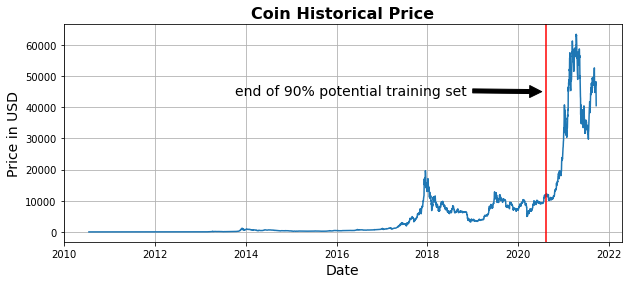

In [ ]:
# plot price for historical data

plt.figure(figsize = (10, 4))
#plt.plot(price)
plt.plot(price['date_dt'], price['PriceUSD'])
#plt.xticks(range(0, df.shape[0], 365), df['date'].loc[::365], rotation=45)
#plt.xticks(range(0, price.shape[0], 182), price['date'].loc[::182], rotation=45)
plt.title('Coin Historical Price', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price in USD', fontsize=14)

time_index_split = int(np.round((len(price)*.90)))   

plt.axvline(x=price.iloc[time_index_split]['date_dt'] , color='r', label='axvline - full height')
#plt.legend(['historical price', 'cutoff at 90%'])


arrow_start = price.iloc[time_index_split]['date_dt'] #+ timedelta(days = 730)
text_start = price.iloc[time_index_split -2500]['date_dt'] #+ timedelta() 

plt.annotate('end of 90% potential training set', xy=(arrow_start, 45000), xytext=(text_start, 44000),
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize = 14
            )

plt.grid()
plt.show()

Normalization

In [ ]:
scaler = MinMaxScaler()

# Fit the scaler with the portion of the dataset that will go to the training set
train_split_value = 0.9
num_train = int(np.round(train_split_value * price.shape[0]))

#price[:num_train][['PriceUSD']].values
#test = [x for x in price[:num_train][['PriceUSD']].values + [100000]]
#scaler.fit(test)

#df['Col1_scaled'] = scaler.fit_transform(df['Col1'].values.reshape(-1,1))

scaler.fit(price[:num_train][['PriceUSD']].values)

normalized_price = pd.DataFrame()
normalized_price['date'] = price['date_dt']
normalized_price['Price'] = scaler.transform(price[['PriceUSD']])
#normalized_price = scaler.transform(price[['PriceUSD']])

In [ ]:
normalized_price

,date,Price
198,2010-07-18,1.797278e-06
199,2010-07-19,1.540665e-06
200,2010-07-20,1.231901e-06
201,2010-07-21,1.458837e-06
202,2010-07-22,4.037146e-07
...,...,...
4277,2021-09-17,2.403902e+00
4278,2021-09-18,2.454319e+00
4279,2021-09-19,2.404140e+00
4280,2021-09-20,2.181998e+00


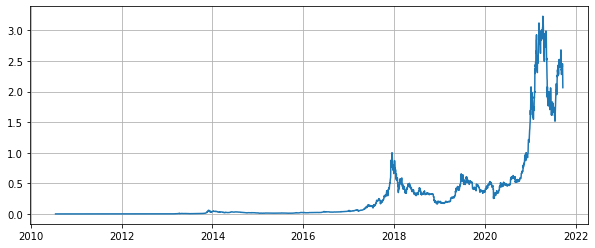

In [ ]:
plt.figure(figsize = (10, 4))
#plt.plot(normalized_price)
plt.plot(normalized_price['date'], normalized_price['Price'])
plt.grid()
plt.show()

Split data for training and testing

In [ ]:
results_windows = []
results_history = []
results_predictions = []

In [ ]:
#normalized_price.shape

In [ ]:
window = 200                          #[#1 #7 #200 #180 #90 #30 #7 #1 #200]
target_size = window + 1

#scaler_train = MinMaxScaler()
#scaler_test = MinMaxScaler()

print(normalized_price.shape[0], "original data points,", "window of ", window)

def data_sequences(dataset, dates, target_size):
    d = []
    dt = []

    for idx in range(len(dataset) - target_size):
        d.append(dataset[idx : idx+target_size])
        dt.append(dates[idx : idx+target_size])

    return np.array(d), np.array(dt)

def split_dataset(dataset, dates, target_size, train_split=0.9):
    
    
    data, dt = data_sequences(dataset, dates, target_size)
    
    assert len(dataset) - target_size == len(data), "Wrong length " + str(len(dataset)) + " vs " + str(len(data))
    print(data.shape)
    print(dt.shape)

    num_train = int(np.round(train_split_value * price.shape[0]))
    print("split at index:", num_train)
#    num_train_update = int(np.round(train_split_value * data.shape[0]))

    window_size_adj_split_index = num_train - target_size

    X_train = data[:window_size_adj_split_index, :-1, :]
    y_train = data[:window_size_adj_split_index, -1, :]

    X_test = data[window_size_adj_split_index:, :-1, :]
    y_test = data[window_size_adj_split_index:, -1, :]

    dt = dt[window_size_adj_split_index:, -1, :]

    return X_train, y_train, X_test, y_test, dt

X_train, y_train, X_test, y_test, date_test = split_dataset(normalized_price[['Price']], normalized_price[['date']], target_size, train_split=train_split_value)
#print(len(X_train), "rows in training data")
# (number of rows in training data, length of window + 1 target, simple 3rd dimension)

4084 original data points, window of  200
(3883, 201, 1)
(3883, 201, 1)
split at index: 3676


In [ ]:
date_test.shape

(408, 1)

In [ ]:
X_train.shape

(3475, 200, 1)

In [ ]:
y_train.shape

(3475, 1)

In [ ]:
X_test.shape

(408, 200, 1)

In [ ]:
y_test.shape

(408, 1)

# Model

### Build the model

In [ ]:
num_neurons = 128
activation_function = 'linear' #'sigmoid'

model = Sequential([
    LSTM(units=num_neurons, input_shape=(window, X_train.shape[-1]), return_sequences=True),
    #LSTM(units=num_neurons, input_shape=(None, 1), return_sequences=True),
    LeakyReLU(alpha=0.8), 
    LSTM(units=num_neurons, return_sequences=True),
    LeakyReLU(alpha=0.8), 
    Dropout(0.2), 
    LSTM(units=int(num_neurons/2), return_sequences=False),
    Dropout(0.2), 
    Dense(units=1, activation=activation_function)
])

2021-09-26 08:24:30.559750: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-09-26 08:24:30.559952: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-09-26 08:24:30.559965: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-09-26 08:24:30.559985: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (p-465bb6a2-b771-4fe2-b2d2-aed723f7eb7d): /proc/driver/nvidia/version does not exist
2021-09-26 08:24:30.560187: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operatio

In [ ]:
loss_function = 'mean_squared_error' #'mean_absolute_error'
model.compile(
    loss=loss_function, 
    optimizer='adam'
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 200, 128)          66560     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 200, 128)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 200, 128)          131584    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 200, 128)          0         
_________________________________________________________________
dropout (Dropout)            (None, 200, 128)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0

In [ ]:
history = model.fit(
    X_train, 
    y_train, 
    epochs=30, 
    batch_size=64, 
    shuffle=False,
    validation_split=0.1
)

Epoch 1/30
2021-09-26 08:24:31.275931: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-09-26 08:24:31.276473: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2499995000 Hz
49/49 [==============================] - 57s 1s/step - loss: 0.0026 - val_loss: 0.1004
Epoch 2/30
49/49 [==============================] - 50s 1s/step - loss: 0.0074 - val_loss: 0.0030
Epoch 3/30
49/49 [==============================] - 50s 1s/step - loss: 0.0084 - val_loss: 0.0028
Epoch 4/30
49/49 [==============================] - 51s 1s/step - loss: 0.0086 - val_loss: 0.0057
Epoch 5/30
49/49 [==============================] - 50s 1s/step - loss: 0.0031 - val_loss: 0.0257
Epoch 6/30
49/49 [==============================] - 50s 1s/step - loss: 7.4465e-04 - val_loss: 0.0019
Epoch 7/30
49/49 [==============================] - 51s 1s/step - loss: 3.9800e-04 - val_loss: 0.0013
Epoch 8/30
49/49 [================

In [ ]:
results_windows.append(window)
results_history.append(history)
results_predictions.append(scaler.inverse_transform(model.predict(X_test)))

### Evaluation

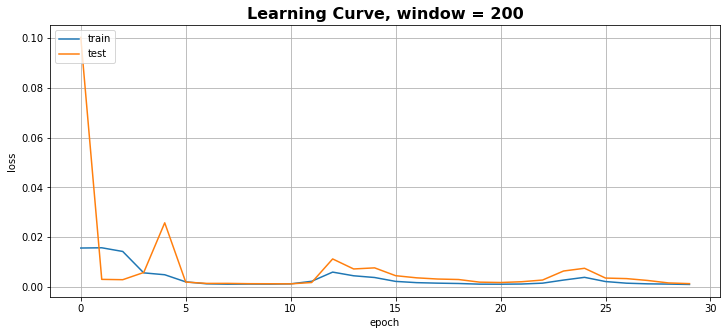

In [ ]:
plt.figure(figsize = (12,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Learning Curve, window = {}'.format(window), fontsize=16, fontweight='bold')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()

### Prediction

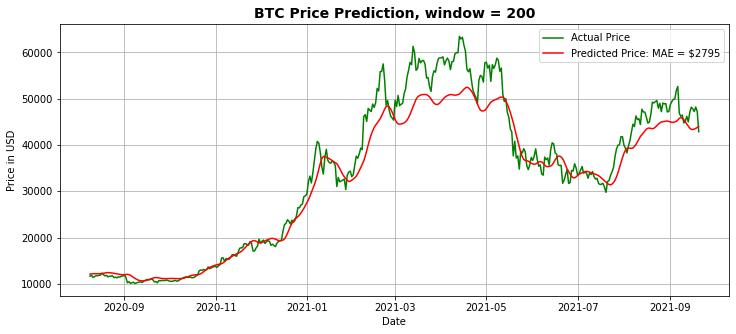

In [ ]:
y_pred = model.predict(X_test)
y_test_inverse = scaler.inverse_transform(y_test)
y_pred_inverse = scaler.inverse_transform(y_pred)


plt.figure(figsize = (12,5))
plt.plot(date_test, y_test_inverse, color='green') #, label="Actual Price"
plt.plot(date_test, y_pred_inverse, color='red') # , label="Predicted Price"


#dates = pd.DataFrame(list(itertools.chain(*price[num_train+1:-1][['date']].values)))
#plt.xticks(range(0, dates.shape[0], 30), dates[0].loc[::30], rotation=45)

#plt.plot(price[num_train:][['date_dt']], price['PriceUSD'])


plt.title('BTC Price Prediction, window = {}'.format(window), fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.legend(["Actual Price", 
            "Predicted Price: MAE = ${}".format(round(np.float_(tf.keras.metrics.mean_absolute_error(y_pred_inverse.T, y_test_inverse.T).numpy()[0])))], 
            #"Predicted Price: window = {}, MAE = ${}".format(window, round(np.float_(tf.keras.metrics.mean_absolute_error(y_pred_inverse.T, y_test_inverse.T).numpy()[0])))], 
            loc='best')
#plt.legend(loc='best')
 
plt.grid() 
plt.show()

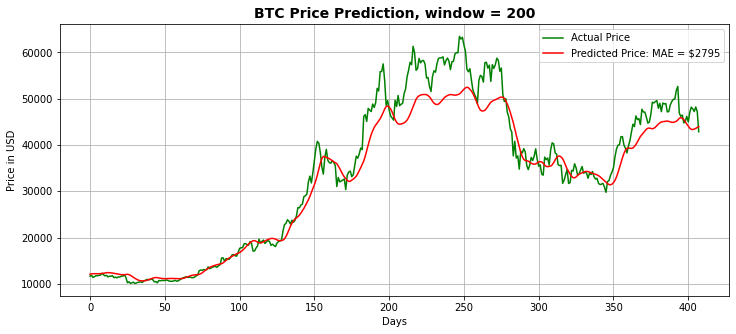

In [ ]:
y_pred = model.predict(X_test)
y_test_inverse = scaler.inverse_transform(y_test)
y_pred_inverse = scaler.inverse_transform(y_pred)


plt.figure(figsize = (12,5))
plt.plot(y_test_inverse, color='green') #, label="Actual Price"
plt.plot(y_pred_inverse, color='red') # , label="Predicted Price"

plt.title('BTC Price Prediction, window = {}'.format(window), fontsize=14, fontweight='bold')
plt.xlabel('Days')
plt.ylabel('Price in USD')
plt.legend(["Actual Price", 
            "Predicted Price: MAE = ${}".format(round(np.float_(tf.keras.metrics.mean_absolute_error(y_pred_inverse.T, y_test_inverse.T).numpy()[0])))], 
            #"Predicted Price: window = {}, MAE = ${}".format(window, round(np.float_(tf.keras.metrics.mean_absolute_error(y_pred_inverse.T, y_test_inverse.T).numpy()[0])))], 
            loc='best')
#plt.legend(loc='best')
 
plt.grid() 
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=465bb6a2-b771-4fe2-b2d2-aed723f7eb7d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>